# Author : Vishnu Kumar D.S

## EY GDS - AICTE 6-WEEK INTERNSHIP
#### Data Analysis  - HealthCare Prediction on Diabetic Patient using Python

In [ ]:
# Inport Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Import Dataset 

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### About Dataset 
Pregnancies,Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunction,
Age,
Outcome

In [5]:
# Describing Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check the Columns present in our Dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# ChecK the Shape of Dataset
data.shape

(768, 9)

In [10]:
#Check if null values are present
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Check the duplicate Values
data.duplicated().sum()

0

### From the Observation we can see that There is no null Values and Duplicate Values to handle

In [13]:
# Now check the rows which has 0 in all.
data["Glucose"][data["Glucose"]==0]

75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64

In [14]:
print("Glucose has ",len(data["Glucose"][data["Glucose"]==0]),"Zero Values")
print("BloodPressure has ",len(data["BloodPressure"][data["BloodPressure"]==0]),"Zero Values")
print("SkinThickness has ",len(data["SkinThickness"][data["SkinThickness"]==0]),"Zero Values")
print("Insulin has",len(data["Insulin"][data["Insulin"]==0]),"Zero Values")

Glucose has  5 Zero Values
BloodPressure has  35 Zero Values
SkinThickness has  227 Zero Values
Insulin has 374 Zero Values


#### NOW WE Should Handle the Missing data 0
#### There are Many way to fill 0 with 
# Imputation Missing Values
### MEAN VALUE IMPUTATION
### MEDIAN VALUE IMPUTATION 
### MODE VALUE IMPUTATION

In [15]:
# Here From the data we can handle 0 by Mean()

In [16]:
# Finding the Mean of all

print(data["Glucose"].mean())
print(data["BloodPressure"].mean())
print(data["SkinThickness"].mean())
print(data["Insulin"].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [17]:
# We got to Know all Mean So,We replace 0 with Mean
# Replacing the null values with the Mean
data["Glucose"]=data["Glucose"].replace([0],[data["Glucose"].mean()])
data["BloodPressure"]=data["BloodPressure"].replace([0],[data["BloodPressure"].mean()])
data["SkinThickness"]=data["SkinThickness"].replace([0],[data["SkinThickness"].mean()])
data["Insulin"]=data["Insulin"].replace([0],[data["Insulin"].mean()])

In [18]:
data[data["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [19]:
# We there is no 0 Values now we replaced all.

In [20]:
len(data[data["SkinThickness"]==0])

0

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
# After Handling Missing VALUES

In [24]:
# Finding the null Value Percentage

selected_columns = ['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage =(data[selected_columns]== 0).mean()*100

In [25]:
print("Percentage is :\n",null_percentage)

Percentage is :
 Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [26]:
# Detect the Outliers

In [27]:
columns=data[selected_columns]

In [28]:
columns

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
4,137.0,40.0,35.000000,168.000000
...,...,...,...,...
763,101.0,76.0,48.000000,180.000000
764,122.0,70.0,27.000000,79.799479
765,121.0,72.0,23.000000,112.000000
766,126.0,60.0,20.536458,79.799479


In [29]:
type(columns)

pandas.core.frame.DataFrame

In [30]:
columns.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'], dtype='object')

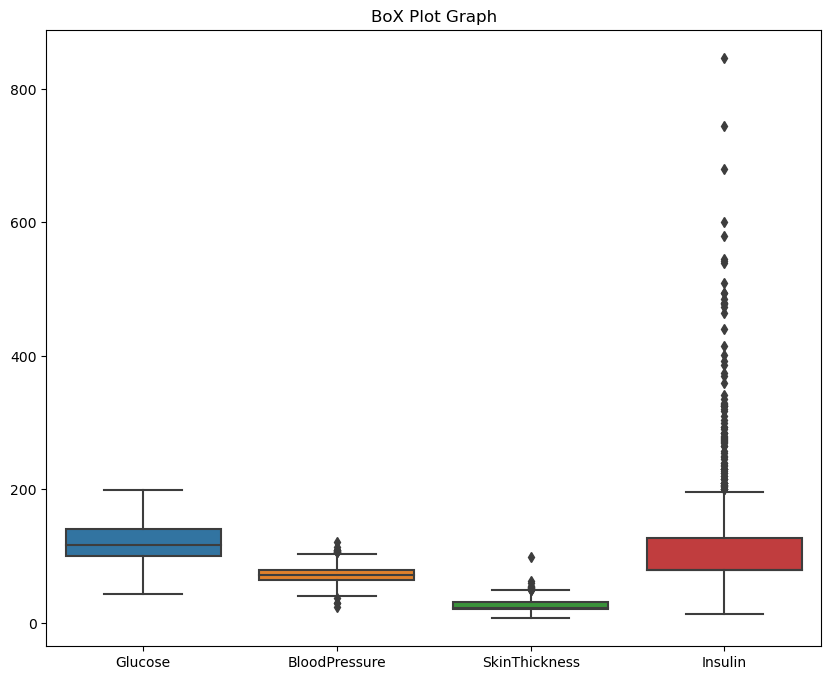

In [31]:
# Visualize Outliers
plt.figure(figsize = (10,8))
sns.boxplot(data=columns)
plt.title("BoX Plot Graph")
plt.show()

# Five-number summary is Method to handle Outliers

#Declearing Minimum,Q1-(25th Percentile),Median-(50th Percentile),Q3-(75th Percentile),Maximum

In [32]:
# minimum,Q1,median,Q3,maximum
def find_outliers(data,col_num):
    Q1 = data[col_num].quantile(0.25)
    Q3 = data[col_num].quantile(0.75)
#Calculate Interquantile Range(IQR)
    IQR = Q3 - Q1
# lower_fence and Upper_fence
    lower_fence =Q1-1.5*IQR
    upper_fence =Q3+1.5*IQR
    
## Finding Outliers
    outliers =data[(data[col_num]< lower_fence)|(data[col_num]> upper_fence)]
    
# Count the number of Outliers
    count_Outliers = len(outliers)
    
    return count_Outliers

# Calculate the no of outliers from each

for col_num in selected_columns:
    outlier_count = find_outliers(data, col_num)
    print(f"Number of Outliers in '{col_num}' column: {outlier_count}")

Number of Outliers in 'Glucose' column: 0
Number of Outliers in 'BloodPressure' column: 14
Number of Outliers in 'SkinThickness' column: 12
Number of Outliers in 'Insulin' column: 89


In [37]:
print(IQR)

47.45052083333333


In [38]:
print(lower_fence)
print(upper_fence)

8.623697916666671
198.42578125


In [34]:
Q1 = data[col_num].quantile(0.25)
Q3 = data[col_num].quantile(0.75)

In [35]:
IQR = Q3-Q1

In [36]:
lower_fence =Q1-1.5*IQR
upper_fence =Q3+1.5*IQR

# Outlier Handling

In [39]:
sorted(data)
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [40]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(678, 9)
(768, 9)


In [41]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

In [42]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479


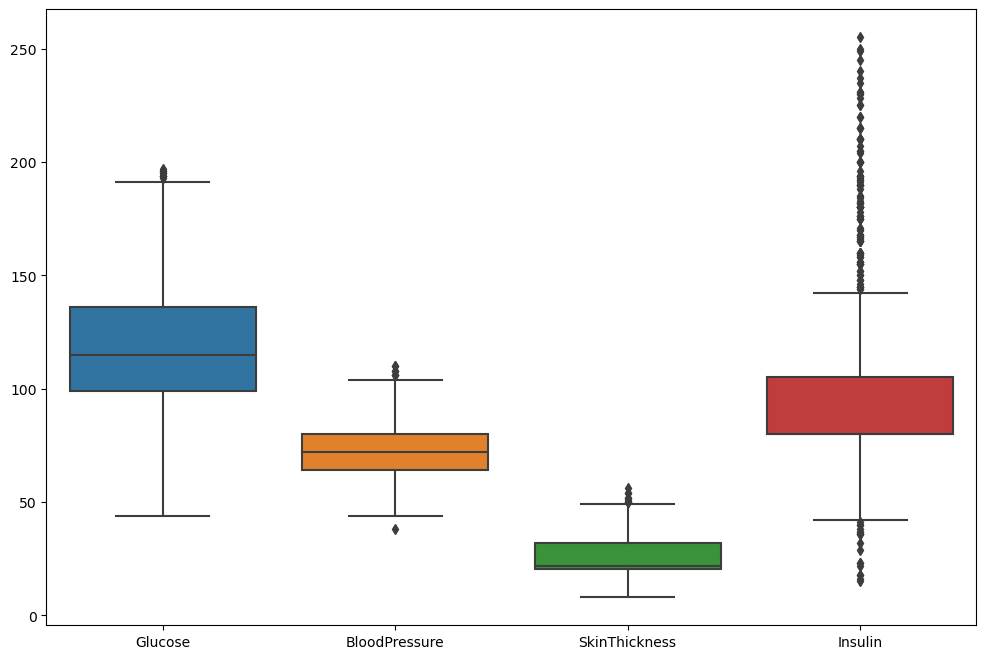

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

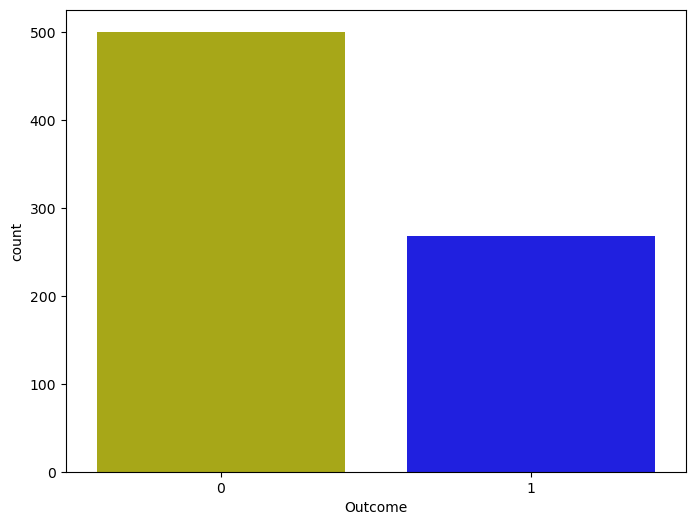

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x=data.Outcome,palette=['y','b'])
plt.show()

# EDA - Exploratory Data Analysis

#### Exploratory data analysis is an approach to analysing data to summarise their main characteristics, often with visual methods.

#### - Univariate analysis:- provides summary statistics for each field in the raw data set (or) summary only on one variable. Ex:- CDF,PDF,Box plot, Violin plot.

#### - Bivariate analysis:- is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding the relationship between them.Ex:-Box plot, Violin plot.

#### - Multivariate analysis:- is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2. Ex:- Pair plot and 3D scatter plot.


# Univariate analysis 
1.Histogram

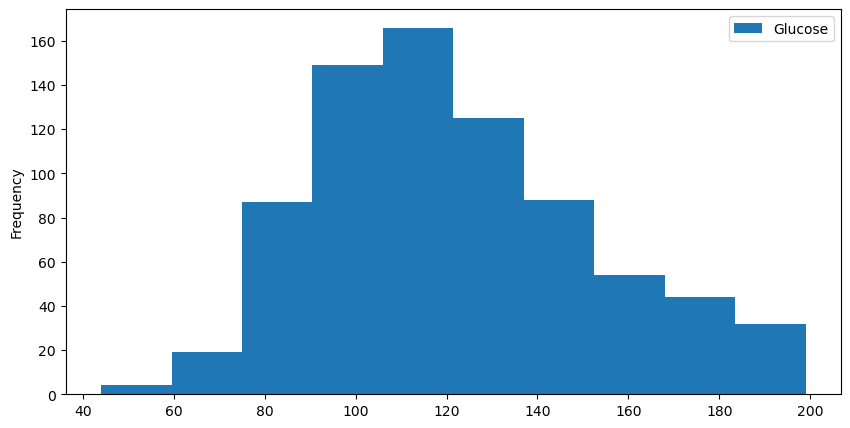

In [45]:
data["Glucose"].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

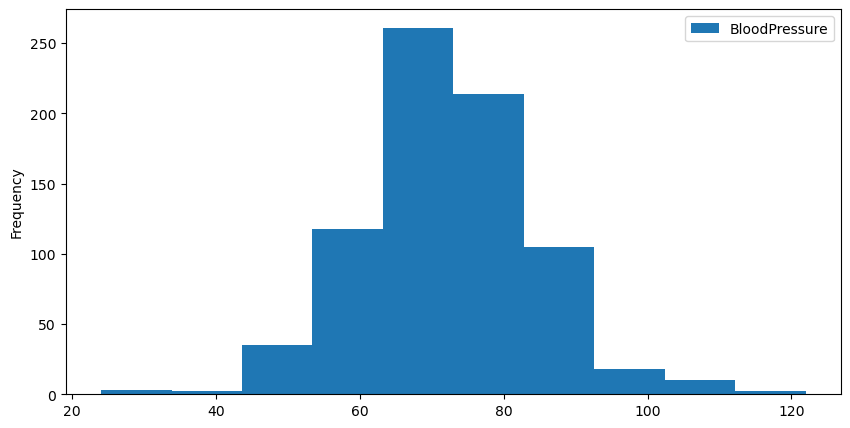

In [46]:
data["BloodPressure"].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

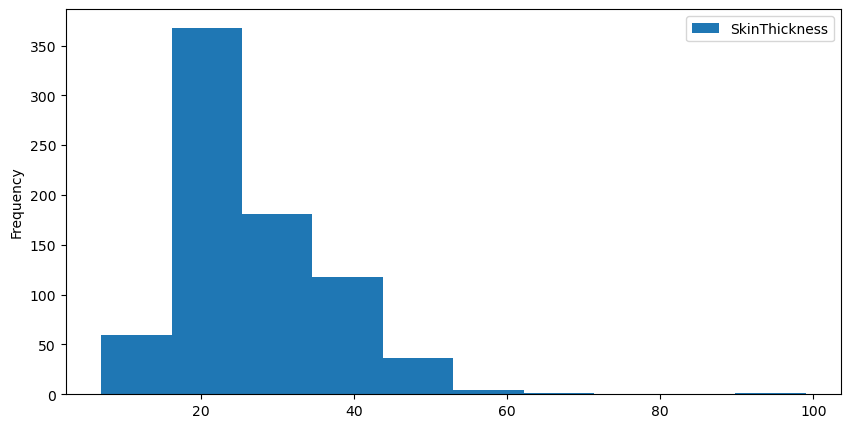

In [47]:
data["SkinThickness"].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

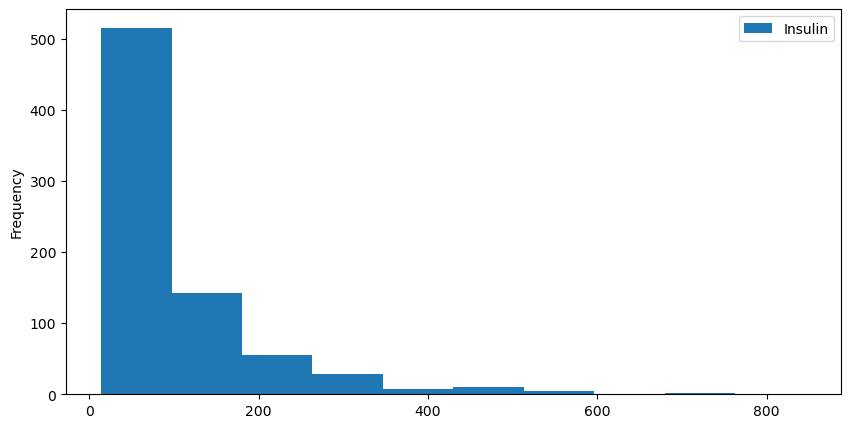

In [48]:
data["Insulin"].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

2.Violin Plot

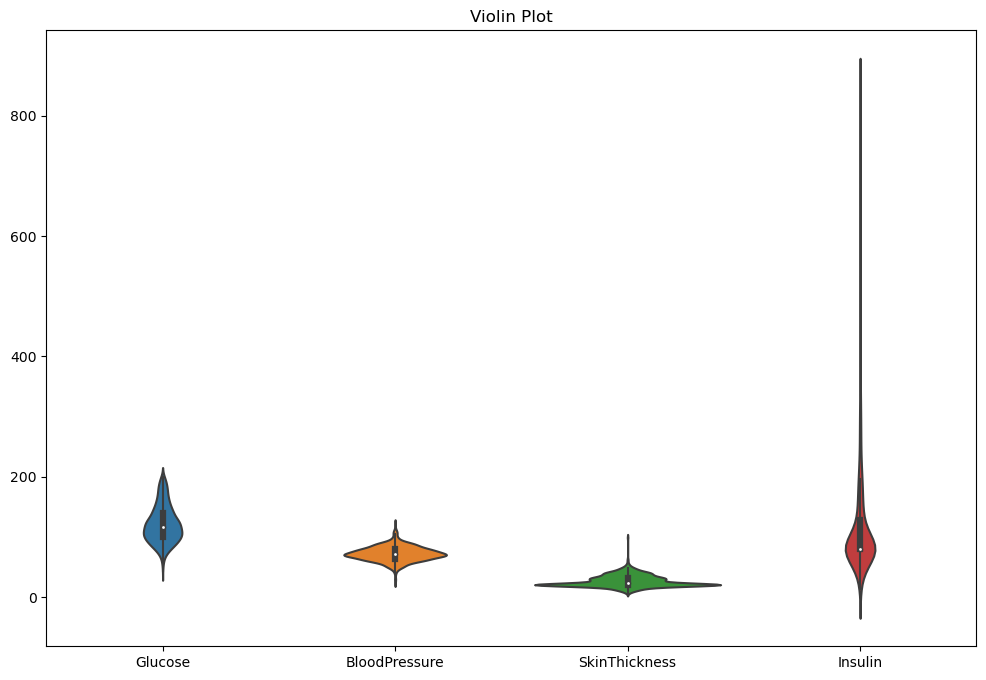

In [49]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot")
plt.show()

3.KDE

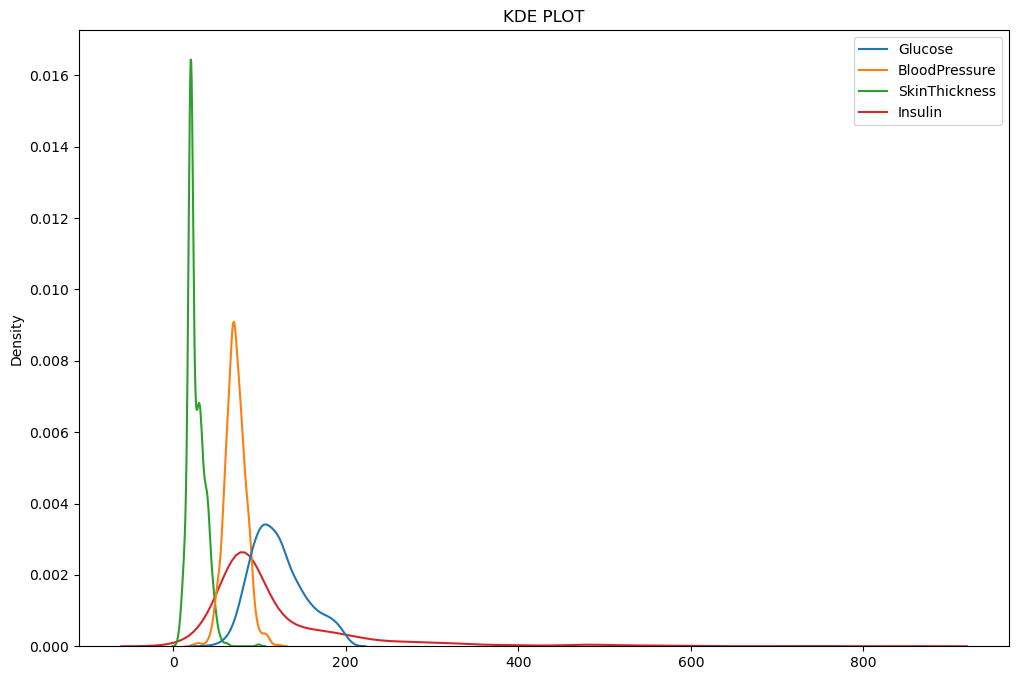

In [50]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data[selected_columns])
plt.title("KDE PLOT")
plt.show()

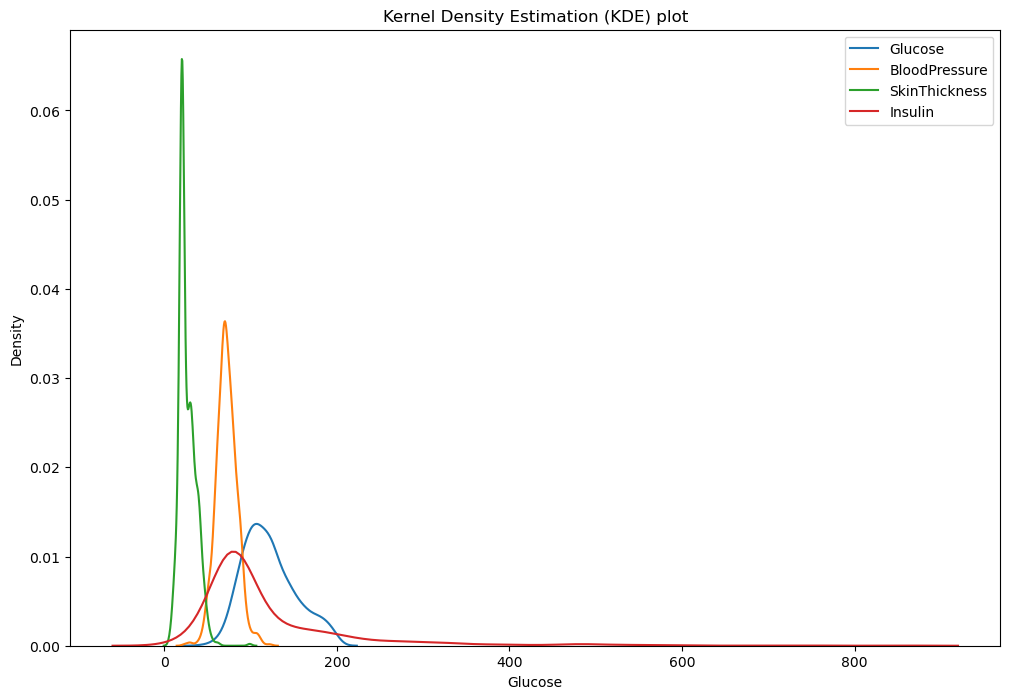

In [51]:
plt.figure(figsize=(12,8))
for i in selected_columns:
    sns.kdeplot(data[i],label=i)
plt.title("Kernel Density Estimation (KDE) plot")
plt.legend()
plt.show()

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [53]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [54]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


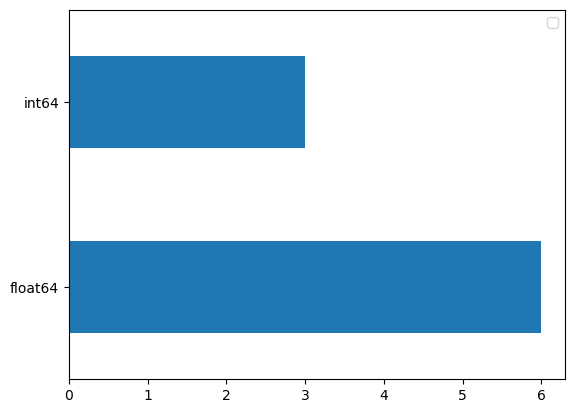

In [55]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

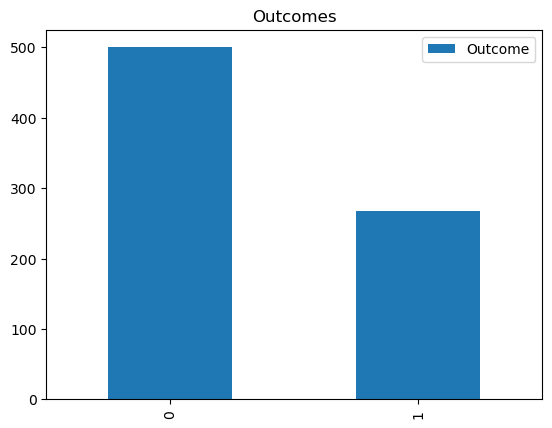

In [56]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title("Outcomes")
plt.show()

In [57]:
# Inference from Outcome Distribution

In [58]:
outcome = (data.Outcome.value_counts()/data.Outcome.shape)*100
print(outcome)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [59]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

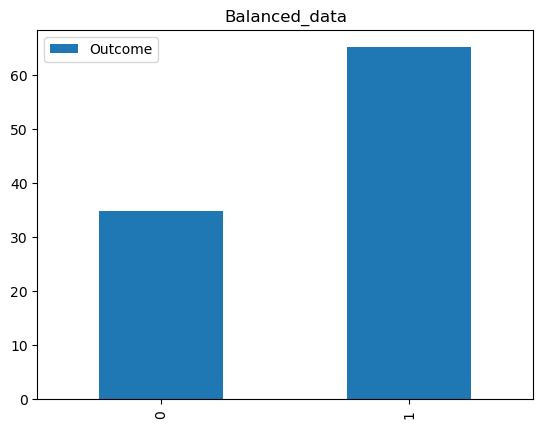

In [60]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

# Bivariate analysis

1.Scatter Plot

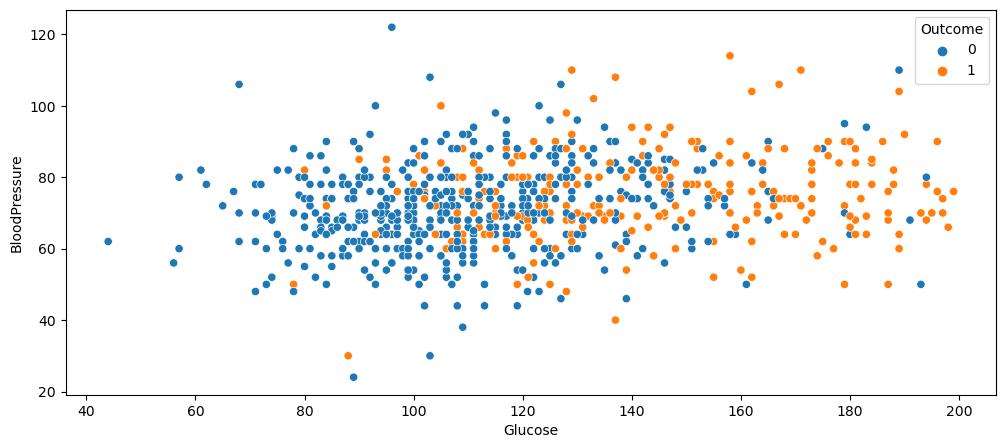

In [61]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y="BloodPressure",hue="Outcome",data=data)
plt.show()

In [62]:
# As From the Observation the Diabetes has low range where after Glucose 120.

In [63]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


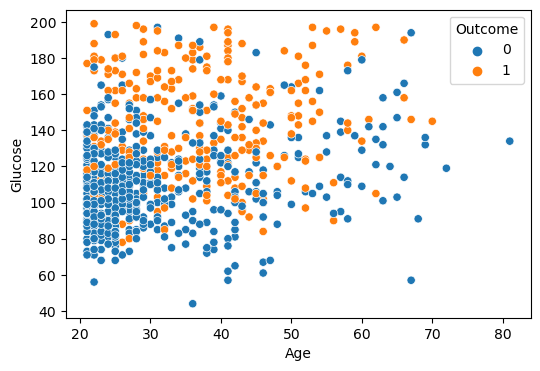

In [64]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

In [65]:
# From the Observation As Dibetes has been Increased at between Age 20 to 30

In [66]:
# MultiVariate Analysis

1.Pairplot

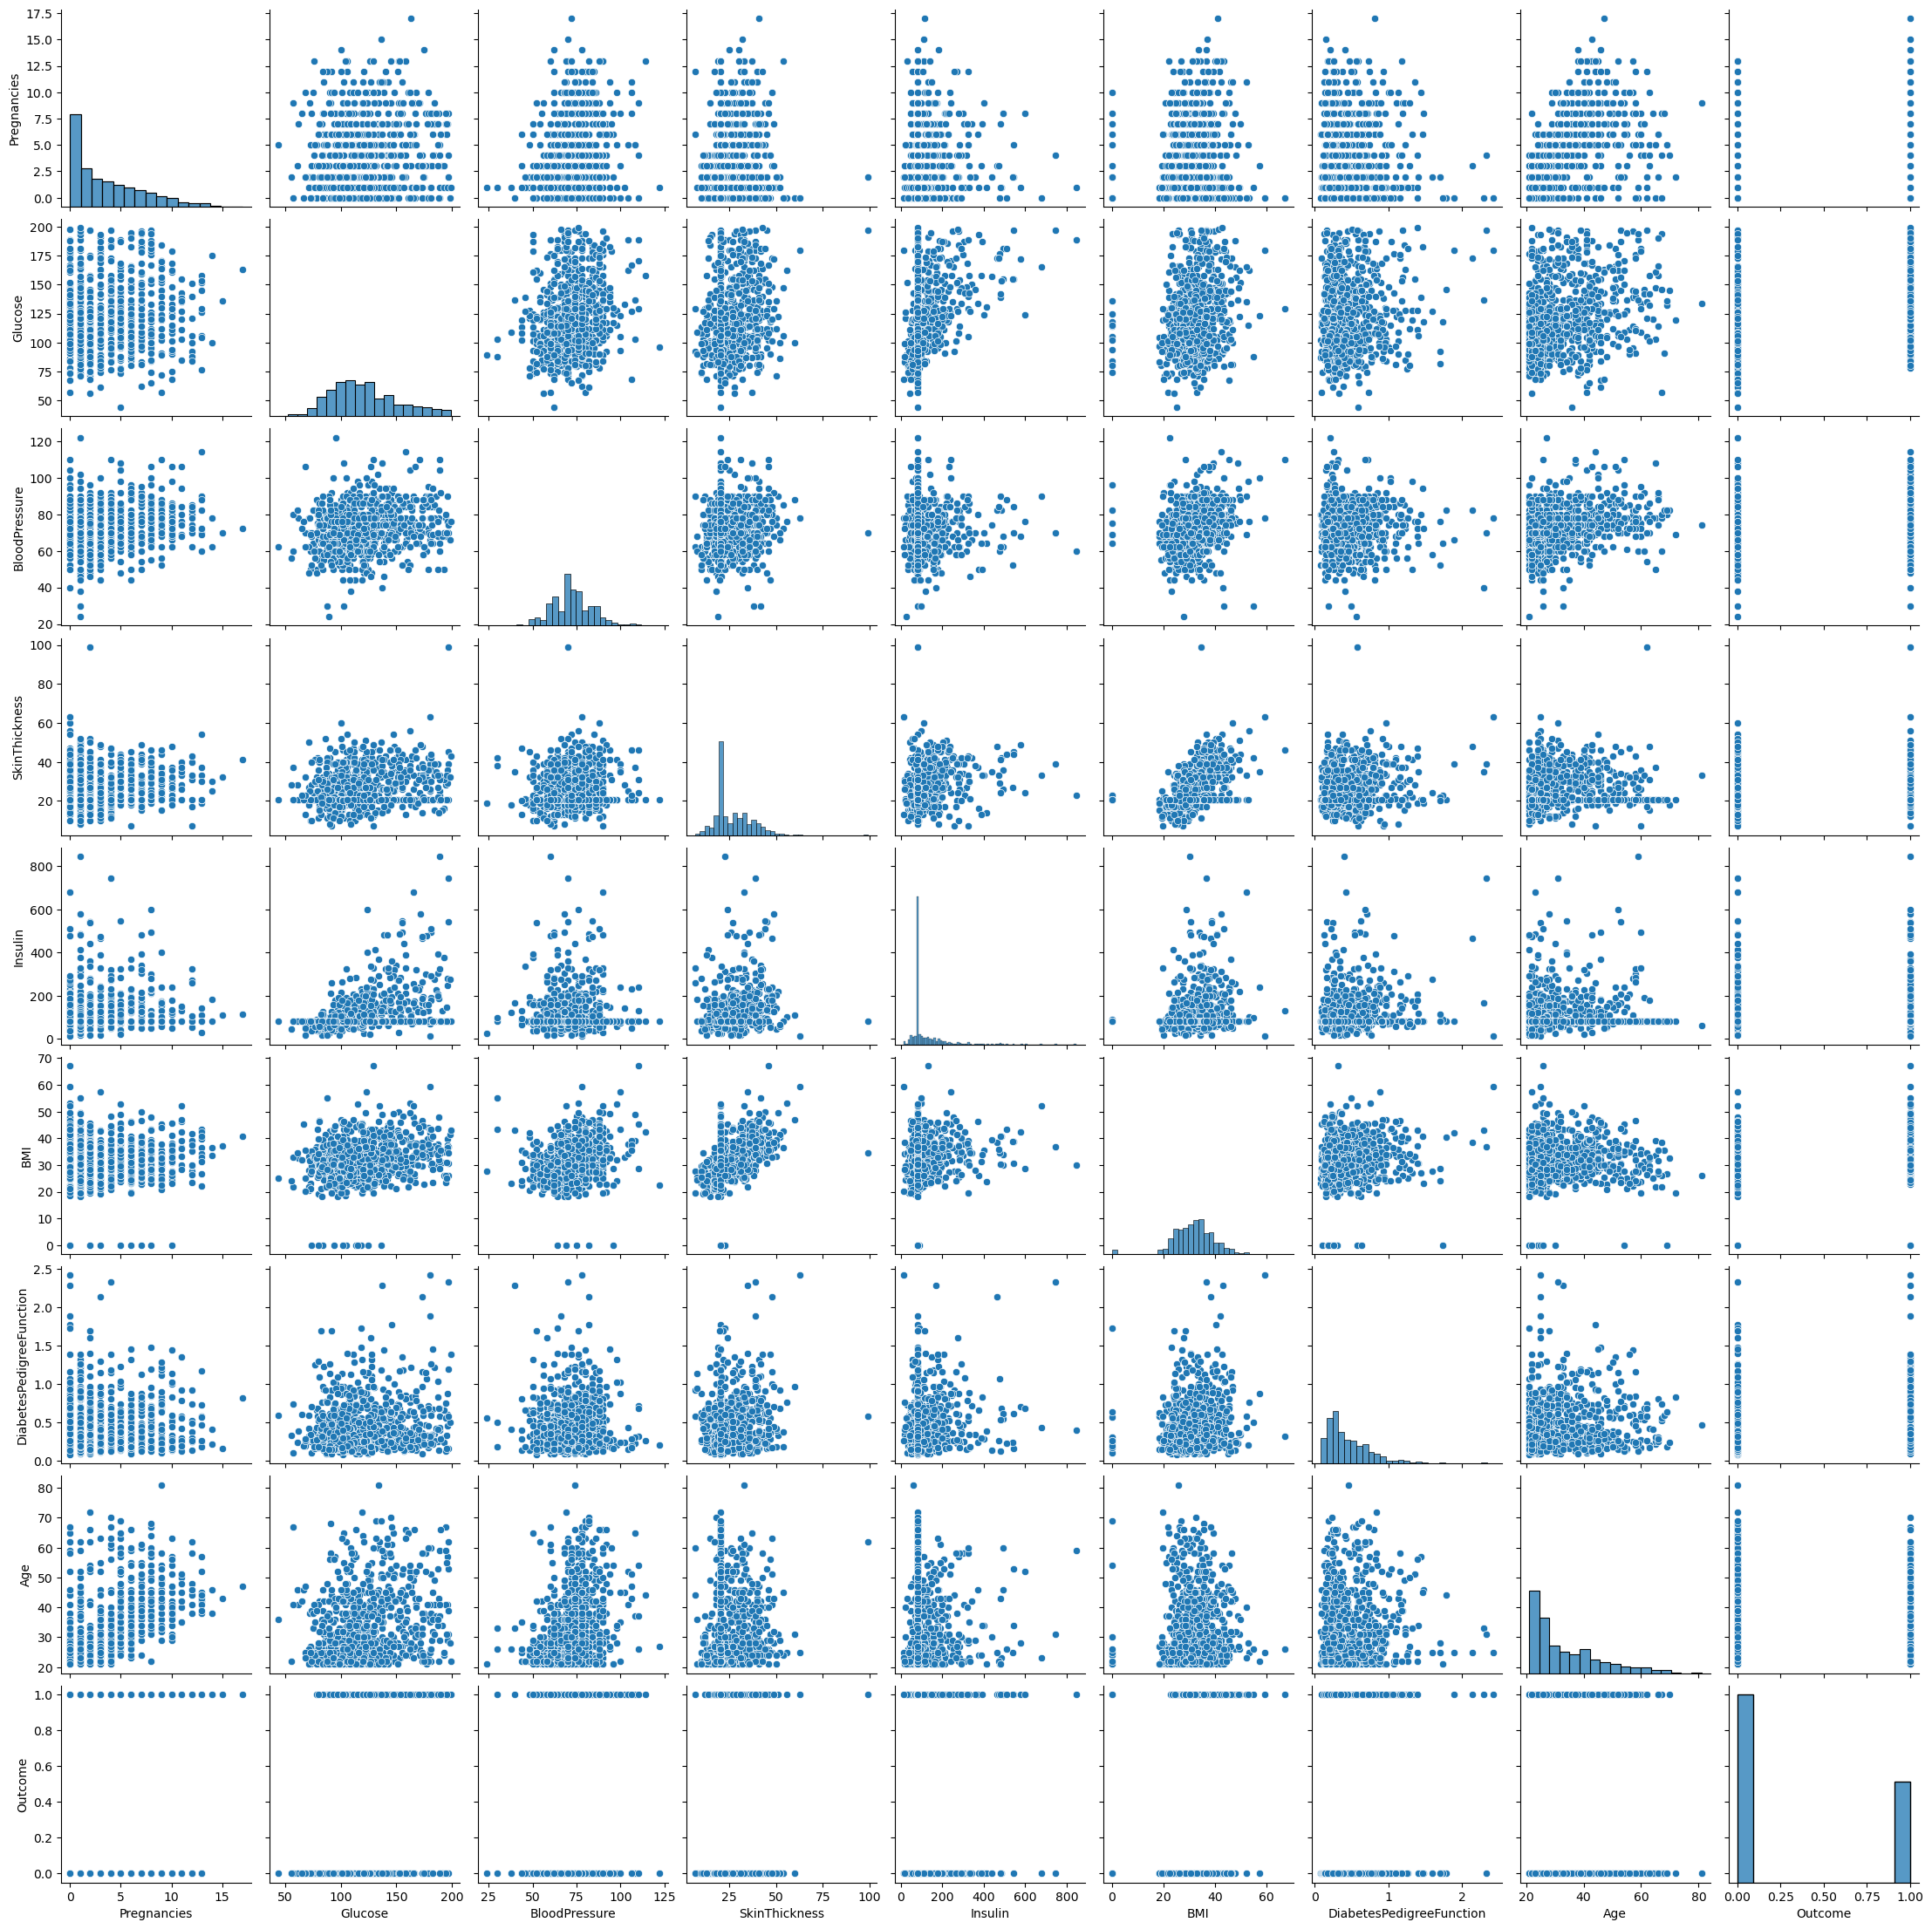

In [67]:
sns.pairplot(data)
plt.show()

2.Heatmap

In [68]:
# Data Correleation

In [69]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.017683,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.235147,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.242656,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.501131,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189337,0.157806,0.038652,0.179185
BMI,0.017683,0.235147,0.242656,0.501131,0.189337,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.292695,0.173844,0.238356,1.000000


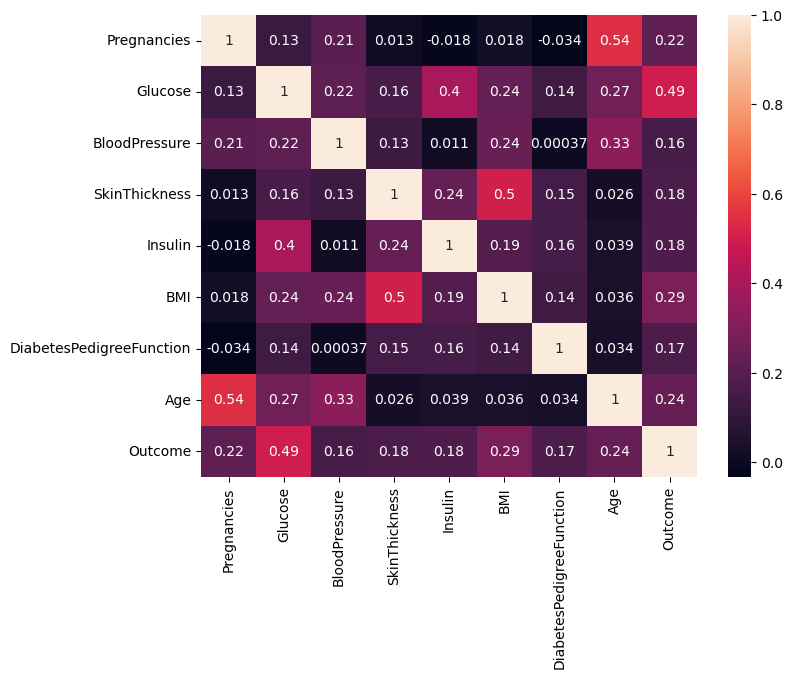

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [71]:
# From The above Observation we can see that Maximum outcome relation with Glucose and minimum with Blood Presure than the other Festures.

# MODEL BUILDING

# strategies for model building :-
    
    1. Descriptive Analysis :-
        -Identify ID, Input and Target features
        -Identify categorical and numerical features
        -Identify columns with missing values
        
    2. Data Treatment (Missing values treatment) :-
        - Detecting outliers & removing them. 
        - Imputing mean, mode or median value at a place of missing value as per dataset   
        
    3.Feature Extraction / Feature Engineering :-
        -we will remove noisy features from data
        -By the help of correlation / heatmap / differnt types of feature selection techniques.
        
    4.Data is imbalanced
        -For balancing the data we wil use SMOTE over sampling techinque.
        
    5.Building a model :-
        - select a best algorithms for model
        
    6.Train a model
    
    7.Evaluation
        - check a accuracy & mean squared error of model
        
    8.Hyper Parameter Tuning :-
        -for decrese in RMSE check a best parameters for model.
        
    9.Create a clasification report.  


In [72]:
# Feature Selection

In [73]:
x = data.drop(['Outcome'],axis=1)
y = data.Outcome

In [74]:
# Finding Correlation with every Feature
data.corrwith(data["Outcome"])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [76]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# Concat two dataframe for better Visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Specs","Score"]   # Naming the Dataframe
print(featureScores.nlargest(8,'Score')) # Print the best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [77]:
type(fit)

sklearn.feature_selection._univariate_selection.SelectKBest

In [78]:
fit.scores_

array([ 111.51969064, 1418.66063574,   41.39466535,   81.91762154,
       1798.08868209,  127.66934333,    5.39268155,  181.30368904])

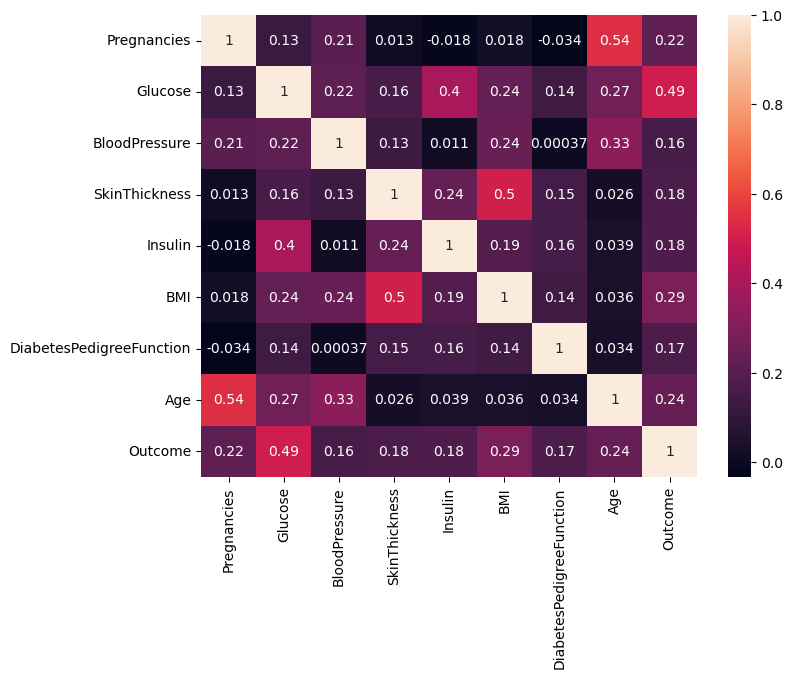

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [80]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [81]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.10942696 0.24128975 0.09601003 0.08535933 0.08079392 0.13901745
 0.11387815 0.1342244 ]


<Axes: >

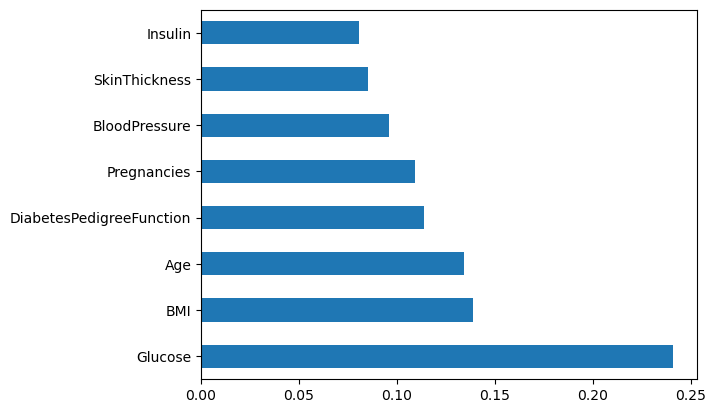

In [82]:
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')

In [83]:
#  From the Observation we can see the Blood pressure has lowest reaction with the Output Column.
# So, We drop the Blood Pressure Column

In [84]:
new_x = data.drop(['Outcome','BloodPressure'],axis=1).values
new_y = data.Outcome.values

## HANDLING IMBALANCED DATASET

## WE CAN HANDLE THE IMBALACE SET BY
### 1.Choosing Proper Evaluation Metric
#### 2.Resampling the Data Set
        a.UPSAMPLING
        b.DOWNSAMPLING
#### 3.SMOTE
#### 4.Balanced Bagging Classifier

#  3.SMOTE to address the Class Imbalance

# Train a Model

In [85]:
trainx,testx,trainy,testy = train_test_split(new_x,new_y,test_size=0.20, random_state=10)

In [86]:
print("BEFORE Oversampling, Counts of label '1': {}".format(sum(trainy == 1 )))
print("BEFORE Oversampling, Counts of label '0': {}".format(sum(trainy == 0)))

BEFORE Oversampling, Counts of label '1': 209
BEFORE Oversampling, Counts of label '0': 405


In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print("After Oversampling, the shape of train_x : {}".format(trainx_res.shape))
print("After Oversampling, counts of label '1': {}".format(sum(trainx_res == 1)))
print("After Oversampling, Counts of label '0': {}".format(sum(trainy_res == 0)))

After Oversampling, the shape of train_x : (810, 7)
After Oversampling, counts of label '1': [119   0   0   0   0   0   0]
After Oversampling, Counts of label '0': 405


# Building Models

## Model 1 : Logistic Regression Model

In [89]:
logreg = LogisticRegression(solver='liblinear',random_state=123)

In [90]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [91]:
prediction = logreg.predict(testx)

In [92]:
print("Prediction is : {}".format(prediction))

Prediction is : [1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0]


In [97]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

In [95]:
print("Accuracy Score is : ",accuracy_score(testy,prediction))
print("Mean Square Error is :",mean_squared_error(testy,prediction))

Accuracy Score is :  0.7337662337662337
Mean Square Error is : 0.2662337662337662


In [96]:
print("Confusion Matrix :",confusion_matrix(testy,prediction))

[[70 25]
 [16 43]]


In [99]:
print("Classification Report :\n",classification_report(testy,prediction))

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



# Why do we use ROC Curve ?
####    The ROC curve is used to assess the overall diagnostic performance of a test and to compare the performance of two or more diagnostic tests

AUC :0.839


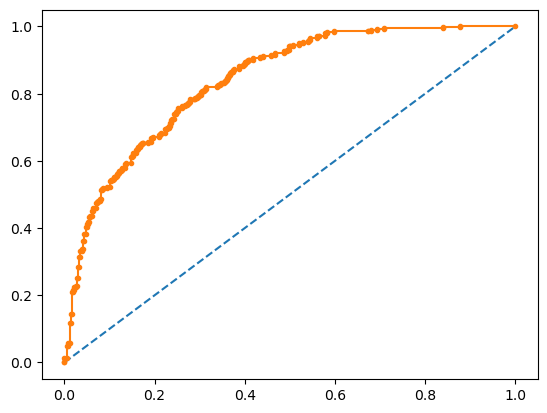

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the Probability

probs = logreg.predict_log_proba(trainx_res)
probs = probs[:,1]
auc = roc_auc_score(trainy_res,probs)
print("AUC :%.3f"% auc)

fpr,tpr, thresholds = roc_curve(trainy_res,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Model 2 : Random Forest Classifier

In [103]:
rf =RandomForestClassifier(random_state=42,max_depth=5)

In [104]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [105]:
predict_rf = rf.predict(testx)

In [106]:
print("Accuracy Score :",accuracy_score(testy,predict_rf))
print("Mean Square Error :",mean_squared_error(testy,predict_rf))


Accuracy Score : 0.7402597402597403
Mean Square Error : 0.2597402597402597


## RandomForestClassifier( Hyper Parameter Tunning)

In [109]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [108]:
param_grid = { 'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],
              'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3],'max_sample':[2,4,3]}


In [110]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [111]:
rf_grid = RandomForestClassifier(criterion='gini',max_depth=2,max_leaf_nodes=3,max_samples=4,min_samples_leaf=1,
                                 min_samples_split=3,n_estimators=400,random_state=42)

In [112]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [113]:
rf_grid_predict = rf_grid.predict(testx)

In [114]:
print("Accuracy Score :",accuracy_score(testy,rf_grid_predict))
print("Mean Square Error :",mean_squared_error(testy,rf_grid_predict))


Accuracy Score : 0.7337662337662337
Mean Square Error : 0.2662337662337662


In [115]:
print((confusion_matrix(testy,prediction)))

[[70 25]
 [16 43]]


In [116]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        95
           1       0.63      0.73      0.68        59

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.74      0.73      0.74       154



AUC :0.938


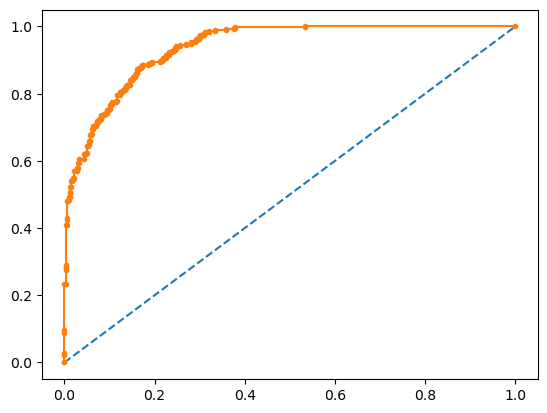

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the Probability

probs = rf.predict_proba(trainx_res)
probs = probs[:,1]
auc = roc_auc_score(trainy_res,probs)
print("AUC :%.3f"% auc)

fpr,tpr, thresholds = roc_curve(trainy_res,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Model 3 : Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dc = DecisionTreeClassifier(random_state=42)

In [122]:
dc.fit(trainx_res,trainy_res)

DecisionTreeClassifier(random_state=42)

In [123]:
dc_pred=dc.predict(testx)

In [124]:
print("Accuracy Score :",accuracy_score(testy,dc_pred))
print("Mean Square Error :",mean_squared_error(testy,dc_pred))

Accuracy Score : 0.6623376623376623
Mean Square Error : 0.33766233766233766


In [125]:
## Decision Tree Classifier(Hyper Parameter Tunning)

In [129]:
dc_param_grid={'splitter':['best','random'],'criterion':['gini','entropy'],'max_depth':[1,2,3],
    'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [130]:
import warnings
warnings.filterwarnings('ignore')
dc_grid =  GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [131]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [132]:
dc_final = DecisionTreeClassifier(criterion='gini',max_depth=2,max_leaf_nodes=4,min_samples_leaf=1,min_samples_split=2,
                                 splitter='best',random_state=42)

In [133]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)

In [134]:
print("Accuracy Score :",accuracy_score(testy,dc_final_pred))
print("Mean Squared Error :",mean_squared_error(testy,dc_final_pred))

Accuracy Score : 0.6883116883116883
Mean Squared Error : 0.3116883116883117


In [135]:
print(confusion_matrix(testy,dc_final_pred))

[[73 22]
 [26 33]]


In [136]:
print(classification_report(testy,dc_final_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC :0.795


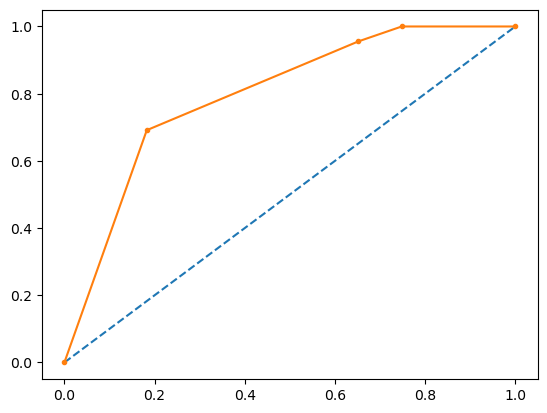

In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the Probability

probs = dc_final.predict_proba(trainx_res)
probs = probs[:,1]
auc = roc_auc_score(trainy_res,probs)
print("AUC :%.3f"% auc)

fpr,tpr, thresholds = roc_curve(trainy_res,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Model 4 : KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier(n_neighbors=4)

In [140]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [142]:
knn_pred = knn.predict(testx)

In [143]:
print("Accuracy Score :",accuracy_score(testy,knn_pred))
print("Mean Squared Error :",mean_squared_error(testy,knn_pred))

Accuracy Score : 0.6233766233766234
Mean Squared Error : 0.37662337662337664


In [144]:
print((confusion_matrix(testy,knn_pred)))

[[68 27]
 [31 28]]


In [145]:
print(classification_report(testy,knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC :0.951


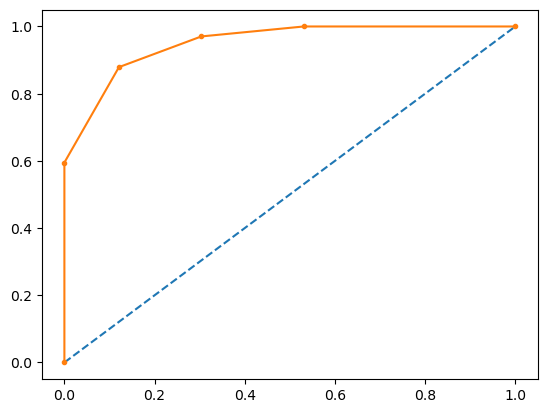

In [146]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict the Probability

probs = knn.predict_proba(trainx_res)
probs = probs[:,1]
auc = roc_auc_score(trainy_res,probs)
print("AUC :%.3f"% auc)

fpr,tpr, thresholds = roc_curve(trainy_res,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Model Accuracy Comparison

In [147]:
Algorithms=['KNN',"RandomForest",'Decisiontree']
Accuracy_score = [accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred)]

In [148]:
accuracy_df = pd.DataFrame({'Algorithm':Algorithms,'Accuracy':Accuracy_score})

In [149]:
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.733766
2  Decisiontree  0.688312
